In [1]:
from agent import LinearKalmanSRTD
from environment import SimpleMDP, TransitionRevaluation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from dynamic_programming import value_iteration
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
from itertools import product
#%matplotlib notebook

/home/jesse/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


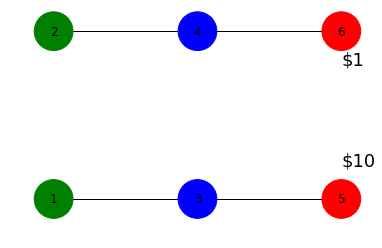

In [2]:
fig, ax = plt.subplots()
ag = LinearKalmanSRTD(environment=TransitionRevaluation())
ax.annotate(xy=(2,.2),s='$10', fontsize=18)
ax.annotate(xy=(2,.8),s='$1', fontsize=18)
ag.env.show_graph()

# Learn initial task

In [3]:
covs=[]
for ep in range(50):
    _ = ag.train_one_episode()
    covs.append(ag.get_covariance([2,6], [4,6]))

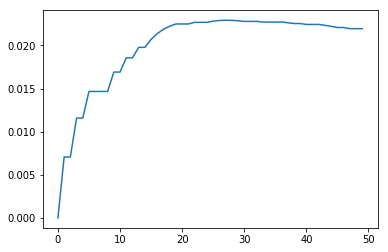

In [4]:
plt.plot(covs)

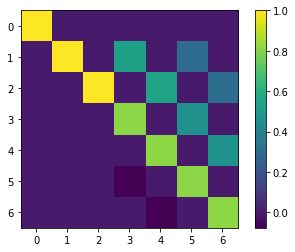

In [5]:
plt.figure()
plt.imshow(ag.M.reshape(ag.env.nr_states, ag.env.nr_states))
plt.colorbar()

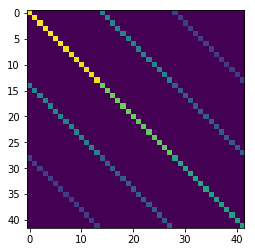

In [6]:
plt.figure()
plt.imshow(ag.covariance[ag.env.nr_states:, ag.env.nr_states:])

In [7]:
M_after_initial_training = ag.M.copy()

In [8]:
ag.w

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       9.60380349, 0.96331621])

In [9]:
# what does the agent choose? 
value = M_after_initial_training.reshape(7,7) @ ag.w

value[1], value[2]

(2.8649060098432853, 0.3028888839138447)

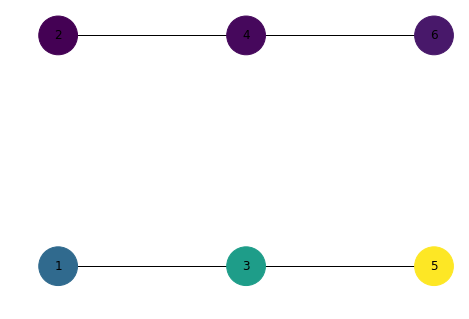

In [10]:
categories = pd.Categorical(value[1:])
node_color = categories

ag.env.show_graph(color_map=node_color)

In [11]:
# Model correctly chooses state 1

chosen_state = np.argmax([value[1], value[2]]) + 1

chosen_state 

1

# Revaluate transitions

In [12]:
ag.env.set_relearning_phase()  # Changes the transition structure

Text(2, 0.8, '$1')

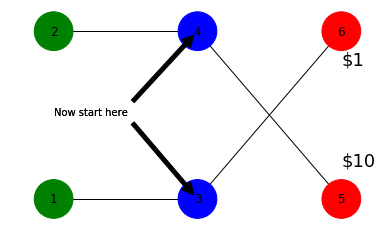

In [13]:
fig, ax = plt.subplots()
ag.env.show_graph()

ax.annotate('Now start here', xy=(1, 1), xytext=(0,.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('Now start here', xy=(1, 0), xytext=(0,.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.annotate(xy=(2,.2),s='$10', fontsize=18)
ax.annotate(xy=(2,.8),s='$1', fontsize=18)


In [14]:
covs = []
for i in range(50):
    ag.train_one_episode()
    
    ag.env.reset()
        
    covs.append(ag.get_covariance([2,6], [4,6]))

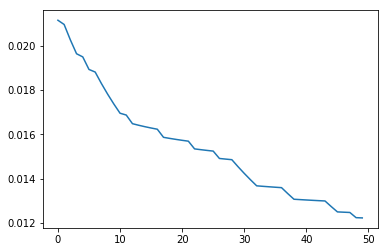

In [15]:
plt.plot(covs)

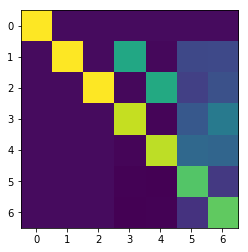

In [16]:
plt.figure()
plt.imshow(ag.M.reshape(7,7))

In [17]:
# 1- 6 is nonzero
ag.M.reshape(7,7)[1,6]

0.19817203479577386

In [18]:
# 2-5 is nonzero
ag.M.reshape(7,7)[2,5]

0.16525747382954628

In [19]:
# after initial training it was zero 
M_after_initial_training.reshape(7,7)[2,5]

0.0

In [20]:
ag.w

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       9.78471475, 0.98231653])

In [21]:
# Choose after second phase

M_after_phase_2 = ag.M.copy()

value = M_after_phase_2.reshape(7,7) @ ag.w

value[1], value[2]

(2.065862436840473, 1.8377484678563967)

In [22]:
value

array([0.        , 2.06586244, 1.83774847, 2.86358108, 3.40284185,
       7.22496501, 1.90197615])

In [23]:
np.around(M_after_phase_2.reshape(7,7), decimals=3)

array([[ 1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  1.   ,  0.   ,  0.588, -0.011,  0.191,  0.198],
       [ 0.   ,  0.   ,  1.   , -0.011,  0.596,  0.165,  0.225],
       [ 0.   ,  0.   ,  0.   ,  0.909, -0.018,  0.253,  0.391],
       [ 0.   ,  0.   ,  0.   , -0.018,  0.899,  0.317,  0.305],
       [ 0.   ,  0.   ,  0.   , -0.025, -0.031,  0.724,  0.141],
       [ 0.   ,  0.   ,  0.   , -0.031, -0.024,  0.119,  0.749]])

In [24]:
np.around(M_after_initial_training.reshape(7,7), decimals=3)

array([[ 1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  1.   ,  0.   ,  0.539,  0.   ,  0.298,  0.   ],
       [ 0.   ,  0.   ,  1.   ,  0.   ,  0.552,  0.   ,  0.314],
       [ 0.   ,  0.   ,  0.   ,  0.814,  0.   ,  0.463,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.818,  0.   ,  0.477],
       [ 0.   ,  0.   ,  0.   , -0.076,  0.   ,  0.814,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   , -0.076,  0.   ,  0.818]])